#  Team6Project1Py




In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import gmaps
import os
import json
from census import Census

# Census API Key
from config import (api_key, gkey)
c = Census(api_key, year=2018)

# gmaps API Key 
gmaps.configure(api_key=gkey)

# define current date string to append to the names of output files...
import datetime  
def _getToday(): return datetime.date.today().strftime("%Y%m%d")   

### Census.gov API calls to get state and county populations in the U.S.

In [2]:
State_Abbrev_df = pd.read_excel("StateAbbreviation.xlsx")
State_Abbrev_df

,State,Abbreviation
0,Alabama,AL
1,Alaska,AK
2,Arizona,AZ
3,Arkansas,AR
4,California,CA
5,Colorado,CO
6,Connecticut,CT
7,Delaware,DE
8,Florida,FL
9,Georgia,GA


In [3]:
# Get state Populations...
census_state_data = c.acs5.get(("NAME", "B01003_001E"), {'for': 'state:*'})
# Convert to DataFrame
census_state_df = pd.DataFrame(census_state_data)

# Column Reordering
census_state_df = census_state_df.rename(columns={"NAME": "State", "B01003_001E": "Population"})
del census_state_df['state']

census_state_df = pd.merge(census_state_df, State_Abbrev_df, on='State', how='inner') 
Census_State_Population = "%s_%s.%s" % ("Output_Data/Census_State_Population", _getToday() ,"csv")
census_state_df.to_csv(Census_State_Population, encoding='utf-8', index=False)

census_state_df


# Get County Populations...
census_county_data = c.acs5.get(("NAME", "B01003_001E"), {'for': 'county:*'})
# Convert to DataFrame
census_county_df = pd.DataFrame(census_county_data)
# Column Reordering
census_county_df = census_county_df.rename(columns={"NAME": "Name",  "county": "County","B01003_001E": "Population"})                                     
census_temp_df = census_county_df[['County','State']] = census_county_df.Name.str.split(", ",expand=True,)
census_temp_df = census_county_df[['County','Literal']] = census_county_df.County.str.split(" County",expand=True,)
del census_county_df['Name'] 
del census_county_df['state']
del census_county_df['Literal']

census_county_df = pd.merge(census_county_df, State_Abbrev_df, on='State', how='inner') 
Census_County_Population = "%s_%s.%s" % ("Output_Data/Census_County_Population", _getToday() ,"csv")
census_county_df.to_csv(Census_County_Population, encoding='utf-8', index=False)

census_county_df

,Population,County,State,Abbreviation
0,47086.0,Washington,Mississippi,MS
1,12028.0,Perry,Mississippi,MS
2,8321.0,Choctaw,Mississippi,MS
3,23480.0,Itawamba,Mississippi,MS
4,10129.0,Carroll,Mississippi,MS
...,...,...,...,...
3137,19994.0,Carroll,Indiana,IN
3138,36378.0,Huntington,Indiana,IN
3139,24217.0,White,Indiana,IN
3140,20993.0,Jay,Indiana,IN


In [4]:

#stateAbbr = pd.read_csv("StateAbbreviation.csv")
#stateAbbr.set_index('State', inplace=True)
#stateAbbr = stateAbbr.to_dict()
#print (stateAbbr)


### COVID Tracking API Calls to get historical and summary data at the State Level
 

In [5]:
#get state historical data
covid_state_url = "https://covidtracking.com/api/v1/states/mn/daily.json?"
covidAPI_response_df = pd.DataFrame(requests.get(covid_state_url).json())
covid_state_df = pd.DataFrame (
        {'Date' : covidAPI_response_df['date'],
         'State' : covidAPI_response_df['state'],
         'Positive' : covidAPI_response_df['positive'],
         'Negative' : covidAPI_response_df['negative'],
         'Recovered' : covidAPI_response_df['recovered'],
         'Date_Checked' : covidAPI_response_df['dateChecked'],
         'Death' : covidAPI_response_df['death'],
         'Hospitalized' : covidAPI_response_df['hospitalized'],
         'Total_Test_Results' : covidAPI_response_df['totalTestResults'],
         'Death_Increase' : covidAPI_response_df['deathIncrease'],
         'Hospitalized_Increase' : covidAPI_response_df['hospitalizedIncrease'],
         'Negative_Increase' : covidAPI_response_df['negativeIncrease'],
         'Positive_Increase' : covidAPI_response_df['positiveIncrease'],
         'Total_Test_Results_Increase' : covidAPI_response_df['totalTestResultsIncrease']})

COV_Tracking_MN_History = "%s_%s.%s" % ("Output_Data/COV_Tracking_MN_History_data", _getToday() ,"csv")
covid_state_df.to_csv(COV_Tracking_MN_History, encoding='utf-8', index=False)
covid_state_df 

,Date,State,Positive,Negative,Recovered,Date_Checked,Death,Hospitalized,Total_Test_Results,Death_Increase,Hospitalized_Increase,Negative_Increase,Positive_Increase,Total_Test_Results_Increase
0,20200423,MN,2942,48606,1536.0,2020-04-23T20:00:00Z,200.0,712.0,51548,21.0,52.0,1983.0,221.0,2204.0
1,20200422,MN,2721,46623,1317.0,2020-04-22T20:00:00Z,179.0,660.0,49344,19.0,31.0,1493.0,154.0,1647.0
2,20200421,MN,2567,45130,1254.0,2020-04-21T20:00:00Z,160.0,629.0,47697,17.0,27.0,750.0,97.0,847.0
3,20200420,MN,2470,44380,1202.0,2020-04-20T20:00:00Z,143.0,602.0,46850,9.0,28.0,1020.0,114.0,1134.0
4,20200419,MN,2356,43360,1160.0,2020-04-19T20:00:00Z,134.0,574.0,45716,13.0,13.0,1305.0,143.0,1448.0
5,20200418,MN,2213,42055,1118.0,2020-04-18T20:00:00Z,121.0,561.0,44268,10.0,43.0,1073.0,142.0,1215.0
6,20200417,MN,2071,40982,1066.0,2020-04-17T20:00:00Z,111.0,518.0,43053,17.0,43.0,1219.0,159.0,1378.0
7,20200416,MN,1912,39763,1020.0,2020-04-16T20:00:00Z,94.0,475.0,41675,7.0,30.0,1330.0,103.0,1433.0
8,20200415,MN,1809,38433,940.0,2020-04-15T20:00:00Z,87.0,445.0,40242,8.0,40.0,887.0,114.0,1001.0
9,20200414,MN,1695,37546,909.0,2020-04-14T20:00:00Z,79.0,405.0,39241,9.0,44.0,769.0,45.0,814.0


In [6]:
covid_state_df.count() 

Date                           49
State                          49
Positive                       49
Negative                       49
Recovered                      24
Date_Checked                   49
Death                          34
Hospitalized                   33
Total_Test_Results             49
Death_Increase                 48
Hospitalized_Increase          48
Negative_Increase              48
Positive_Increase              48
Total_Test_Results_Increase    48
dtype: int64

In [7]:
#get state summary data
covid_currstate_url = "https://covidtracking.com/api/v1/states/mn/current.json?"
covidAPI_currresponse_df = pd.DataFrame(requests.get(covid_currstate_url).json(), index=[0])
covid_currstate_df = pd.DataFrame (        
         {'State' : covidAPI_currresponse_df['state'],
         'Positive' : covidAPI_currresponse_df['positive'],
         'Negative' : covidAPI_currresponse_df['negative'],
         'Recovered' : covidAPI_currresponse_df['recovered'],
         'Date_Checked' : covidAPI_currresponse_df['dateChecked'],
         'Death' : covidAPI_currresponse_df['death'],
         'Hospitalized' : covidAPI_currresponse_df['hospitalized'],
         'Total_Test_Results' : covidAPI_currresponse_df['totalTestResults']})

COV_Tracking_MN_Summary = "%s_%s.%s" % ("Output_Data/COV_Tracking_MN_Summary_data", _getToday() ,"csv")
covid_currstate_df.to_csv(COV_Tracking_MN_Summary, encoding='utf-8', index=False)
covid_currstate_df 

,State,Positive,Negative,Recovered,Date_Checked,Death,Hospitalized,Total_Test_Results
0,MN,2942,48606,1536,2020-04-23T18:40:00Z,200,712,51548


### COVID Tracking API Calls to get summary and historical data  at the National Level

In [8]:
#get national history data
covid_national_url = "https://covidtracking.com/api/us/daily.json?"
covidAPI_natresp_df = pd.DataFrame(requests.get(covid_national_url).json())
covid_national_df = pd.DataFrame (
        {'Date' : covidAPI_natresp_df['date'],
         'States' : covidAPI_natresp_df['states'],
         'Positive' : covidAPI_natresp_df['positive'],
         'Negative' : covidAPI_natresp_df['negative'],
         'Recovered' : covidAPI_natresp_df['recovered'],
         'Date_Checked' : covidAPI_natresp_df['dateChecked'],
         'Death' : covidAPI_natresp_df['death'],
         'Hospitalized' : covidAPI_natresp_df['hospitalized'],
         'Total_Test_Results' : covidAPI_natresp_df['totalTestResults'],
         'Death_Increase' : covidAPI_natresp_df['deathIncrease'],
         'Hospitalized_Increase' : covidAPI_natresp_df['hospitalizedIncrease'],
         'Negative_Increase' : covidAPI_natresp_df['negativeIncrease'],
         'Positive_Increase' : covidAPI_natresp_df['positiveIncrease'],
         'Total_Test_Results_Increase' : covidAPI_natresp_df['totalTestResultsIncrease']})

COV_Tracking_US_History = "%s_%s.%s" % ("Output_Data/COV_Tracking_US_History_data", _getToday() ,"csv")
covid_national_df.to_csv(COV_Tracking_US_History, encoding='utf-8', index=False)
covid_national_df 

,Date,States,Positive,Negative,Recovered,Date_Checked,Death,Hospitalized,Total_Test_Results,Death_Increase,Hospitalized_Increase,Negative_Increase,Positive_Increase,Total_Test_Results_Increase
0,20200423,56,859318,3800932.0,63547.0,2020-04-23T20:00:00Z,44014.0,91108.0,4660250,1911.0,5643.0,161309.0,31355.0,192664.0
1,20200422,56,827963,3639623.0,61519.0,2020-04-22T20:00:00Z,42103.0,85465.0,4467586,2108.0,1173.0,284162.0,27658.0,311820.0
2,20200421,56,800305,3355461.0,58117.0,2020-04-21T20:00:00Z,39995.0,84292.0,4155766,2674.0,1413.0,124434.0,27285.0,151719.0
3,20200420,56,773020,3231027.0,54438.0,2020-04-20T20:00:00Z,37321.0,82879.0,4004047,1528.0,1998.0,114366.0,23534.0,137900.0
4,20200419,56,749486,3116661.0,53630.0,2020-04-19T20:00:00Z,35793.0,80881.0,3866147,1654.0,2042.0,140309.0,26920.0,167229.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,20200126,1,1,NaN,NaN,2020-01-26T21:00:00Z,NaN,NaN,1,0.0,0.0,0.0,0.0,0.0
89,20200125,1,1,NaN,NaN,2020-01-25T21:00:00Z,NaN,NaN,1,0.0,0.0,0.0,0.0,0.0
90,20200124,1,1,NaN,NaN,2020-01-24T21:00:00Z,NaN,NaN,1,0.0,0.0,0.0,0.0,0.0
91,20200123,1,1,NaN,NaN,2020-01-23T21:00:00Z,NaN,NaN,1,0.0,0.0,0.0,0.0,0.0


In [9]:
covid_national_df.count()

Date                           93
States                         93
Positive                       93
Negative                       52
Recovered                      30
Date_Checked                   93
Death                          56
Hospitalized                   34
Total_Test_Results             93
Death_Increase                 92
Hospitalized_Increase          92
Negative_Increase              92
Positive_Increase              92
Total_Test_Results_Increase    92
dtype: int64

In [10]:
#get national summary data
covid_natsum_url = "https://covidtracking.com/api/v1/states/current.json?"
covidAPI_natsum_df = pd.DataFrame(requests.get(covid_natsum_url).json())
covid_natsum_df = pd.DataFrame (        
         {'State' : covidAPI_natsum_df['state'],
         'Positive' : covidAPI_natsum_df['positive'],
         'Negative' : covidAPI_natsum_df['negative'],
         'Recovered' : covidAPI_natsum_df['recovered'],
         'Date_Checked' : covidAPI_natsum_df['dateChecked'],
         'Death' : covidAPI_natsum_df['death'],
         'Hospitalized' : covidAPI_natsum_df['hospitalized'],
         'Total_Test_Results' : covidAPI_natsum_df['totalTestResults']})
         
COV_Tracking_US_Summary = "%s_%s.%s" % ("Output_Data/COV_Tracking_US_Summary_data", _getToday() ,"csv")
covid_natsum_df.to_csv(COV_Tracking_US_Summary, encoding='utf-8', index=False)
covid_natsum_df 

,State,Positive,Negative,Recovered,Date_Checked,Death,Hospitalized,Total_Test_Results
0,AK,337,11824,209.0,2020-04-23T19:36:00Z,9.0,NaN,12161
1,AL,5832,46863,NaN,2020-04-24T02:16:00Z,197.0,768.0,52695
2,AR,2599,31952,922.0,2020-04-24T12:43:00Z,45.0,291.0,34551
3,AZ,5769,52928,1282.0,2020-04-24T12:46:00Z,249.0,941.0,58697
4,CA,37369,444728,NaN,2020-04-24T12:23:00Z,1469.0,NaN,482097
5,CO,11262,41062,NaN,2020-04-24T02:39:00Z,552.0,2237.0,52324
6,CT,23100,48397,NaN,2020-04-23T20:31:00Z,1639.0,NaN,71497
7,DC,3361,12569,648.0,2020-04-23T19:50:00Z,139.0,NaN,15930
8,DE,3308,13604,643.0,2020-04-23T19:52:00Z,92.0,NaN,16912
9,FL,29648,271499,NaN,2020-04-24T02:33:00Z,1006.0,4827.0,301147


In [11]:
covid_natsum_df.count()

State                 56
Positive              56
Negative              56
Recovered             32
Date_Checked          56
Death                 55
Hospitalized          31
Total_Test_Results    56
dtype: int64

### John Hopkins University stats for ALL U.S. Counties

In [12]:
# Load the JHU data
JHU_data_df = pd.read_csv("JHU-04-21-2020.csv")
JHU_data_df = JHU_data_df.dropna()

JHU_data_df = pd.merge(JHU_data_df, State_Abbrev_df, left_on=['Province_State'], right_on=['State'], how='left') 

JHU_data = "%s_%s.%s" % ("Output_Data/JHU_data", _getToday() ,"csv")

JHU_data_df.to_csv(JHU_data, encoding='utf-8', index=False)

JHU_data_df

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,State,Abbreviation
0,45001.0,Abbeville,South Carolina,US,2020-04-21 23:30:50,34.223334,-82.461707,17,0,0,17,"Abbeville, South Carolina, US",South Carolina,SC
1,22001.0,Acadia,Louisiana,US,2020-04-21 23:30:50,30.295065,-92.414197,114,7,0,107,"Acadia, Louisiana, US",Louisiana,LA
2,51001.0,Accomack,Virginia,US,2020-04-21 23:30:50,37.767072,-75.632346,52,0,0,52,"Accomack, Virginia, US",Virginia,VA
3,16001.0,Ada,Idaho,US,2020-04-21 23:30:50,43.452658,-116.241552,616,12,0,604,"Ada, Idaho, US",Idaho,ID
4,19001.0,Adair,Iowa,US,2020-04-21 23:30:50,41.330756,-94.471059,1,0,0,1,"Adair, Iowa, US",Iowa,IA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2755,2290.0,Yukon-Koyukuk,Alaska,US,2020-04-21 23:30:50,65.508155,-151.390739,1,0,0,1,"Yukon-Koyukuk, Alaska, US",Alaska,AK
2756,4027.0,Yuma,Arizona,US,2020-04-21 23:30:50,32.768957,-113.906667,32,1,0,31,"Yuma, Arizona, US",Arizona,AZ
2757,8125.0,Yuma,Colorado,US,2020-04-21 23:30:50,40.003468,-102.425867,3,0,0,3,"Yuma, Colorado, US",Colorado,CO
2758,48505.0,Zapata,Texas,US,2020-04-21 23:30:50,27.001564,-99.169872,6,0,0,6,"Zapata, Texas, US",Texas,TX


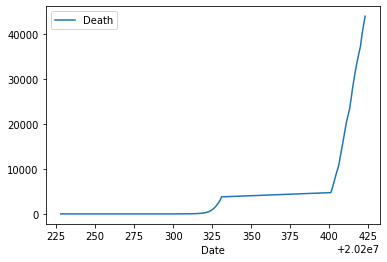

In [13]:
#plt.plot(covid_national_df)
#plt.plot(covid_state_df)

covid_national_df.plot(kind = 'line', x = 'Date', y = 'Death')